터미널에서   
conda install -c anaconda requests  https://anaconda.org/anaconda/requests  
conda install bs4   
conda install lxml

In [1]:
import requests

In [2]:
r = requests.get('https://www.naver.com/')
print(r)

<Response [200]>



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
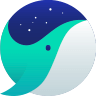
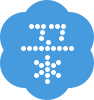

In [3]:
print(r.text)

In [4]:
html = requests.get('https://www.google.co.kr/').text
print(html)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2022/seasonal-holidays-2022-6753651837109831.4-law.gif" itemprop="image"><meta content="2022 연말연시" property="twitter:title"><meta content=" " property="twitter:description"><meta content=" " property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2022/seasonal-holidays-2022-6753651837109831.2-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2022/seasonal-holidays-2022-6753651837109831.2-2xa.gif" property="og:image"><meta content="1150" property="og:image:width"><meta content="460" property="og:image:height"><meta content="https://www.google.com/logos/doodles/2022/seasonal-holidays-2022-6753651837109831.2-2xa.gif" property="og:url"><me

In [5]:
from bs4 import BeautifulSoup

In [6]:
html = """<html><body><div><span>
        <a href=http://www.naver.com>naver</a>
        <a href=https://www.google.com>google</a>
        <a href=http://www.daum.net/>daum</a>
    </span></div></body></html>"""

In [7]:
soup = BeautifulSoup(html, 'lxml')

In [8]:
print(soup)

<html><body><div><span>
<a href="http://www.naver.com">naver</a>
<a href="https://www.google.com">google</a>
<a href="http://www.daum.net/">daum</a>
</span></div></body></html>


In [9]:
print(soup.prettify())

<html>
 <body>
  <div>
   <span>
    <a href="http://www.naver.com">
     naver
    </a>
    <a href="https://www.google.com">
     google
    </a>
    <a href="http://www.daum.net/">
     daum
    </a>
   </span>
  </div>
 </body>
</html>


In [10]:
print(soup.find('a')) # 첫번째 a가 포함된 

<a href="http://www.naver.com">naver</a>


In [11]:
print(soup.find('a').get_text())

naver


In [12]:
print(soup.find_all('a'))

[<a href="http://www.naver.com">naver</a>, <a href="https://www.google.com">google</a>, <a href="http://www.daum.net/">daum</a>]


In [13]:
sites = soup.find_all('a')
for site in sites:
    print(site.get_text())

naver
google
daum


In [14]:
html2 = """
<html>
 <head>
  <title>작품과 작가 모음</title>
 </head>
 <body>
  <h1>책 정보</h1>
  <p id="book_title">토지</p>
  <p id="author">박경리</p>

  <p id="book_title">태백산맥</p>
  <p id="author">조정래</p>

  <p id="book_title">감옥으로부터의 사색</p>
  <p id="author">신영복</p>
 </body>
</html>
"""

In [15]:
soup2 = BeautifulSoup(html2, 'lxml')

In [16]:
print(soup2.title)

<title>작품과 작가 모음</title>


In [17]:
print(soup2.body)

<body>
<h1>책 정보</h1>
<p id="book_title">토지</p>
<p id="author">박경리</p>
<p id="book_title">태백산맥</p>
<p id="author">조정래</p>
<p id="book_title">감옥으로부터의 사색</p>
<p id="author">신영복</p>
</body>


In [18]:
print(soup2.body.h1)

<h1>책 정보</h1>


In [19]:
print(soup2.find('p', {'id': 'book_title'}))

<p id="book_title">토지</p>


In [20]:
print(soup2.find('p', {'id': 'book_title'}).get_text())

토지


In [21]:
print(soup2.find_all('p', {'id': 'book_title'}))

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


In [22]:
titles = soup2.find_all('p', {'id': 'book_title'})
for title in titles:
    print(title.get_text())

토지
태백산맥
감옥으로부터의 사색


In [23]:
book_titles = soup2.find_all('p', {"id":"book_title"})
authors = soup2.find_all('p', {"id":"author"})

for book_title, author in zip(book_titles, authors):
    print(book_title.get_text() + '/' + author.get_text())

토지/박경리
태백산맥/조정래
감옥으로부터의 사색/신영복


In [24]:
print(soup2.select('body h1'))

[<h1>책 정보</h1>]


In [25]:
print(soup2.select('body p'))

[<p id="book_title">토지</p>, <p id="author">박경리</p>, <p id="book_title">태백산맥</p>, <p id="author">조정래</p>, <p id="book_title">감옥으로부터의 사색</p>, <p id="author">신영복</p>]


In [26]:
print(soup2.select('p'))

[<p id="book_title">토지</p>, <p id="author">박경리</p>, <p id="book_title">태백산맥</p>, <p id="author">조정래</p>, <p id="book_title">감옥으로부터의 사색</p>, <p id="author">신영복</p>]


In [27]:
print(soup2.select('p#book_title'))

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


In [28]:
html3 = """
<!doctype html>
<html>
    <head>
    <meta charset="utf-8">
    <title>사이트 모음</title>
    </head>
    <body>
    <p id="title">
    <b>자주 가는 사이트 모음</b>
    </p>
    <p id="contents">이곳은 자주 가는 사이트를 모아둔 곳입니다.</p>
    <a href="http://www.naver.com" class="portal" id="naver">네이버</a> <br>
    <a href="https://www.google.com" class="search" id="google">구글</a> <br>
    <a href="http://www.daum.net" class="portal" id="daum">다음</a> <br>
    <a href="http://www.nl.go.kr" class="government" id="nl">국립중앙도서관</a>
    </body>
</html>
"""

In [29]:
soup3 = BeautifulSoup(html3, 'lxml')

In [30]:
print(soup3.select('a.portal'))

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>, <a class="portal" href="http://www.daum.net" id="daum">다음</a>]
